In [174]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, FeatureUnion

# Object Oriented Programming in Sklearn

In this extra lesson we will be digging a bit deeper into the `sklearn` library.  Our objective is not so much to learn about `sklearn`, but to explore how a professionaly developed, widely used library uses the organizational principles of object oriented programming to provide a good user experience.

The main theme of our explorations will be the power of **Providing a Consistent Interface**.  One of the fundamental commandments of OOP is:

> Program to an interface instead of an implementation.

Sklearn is a stellar example of this important programming philosophy.

## Regressors and Classifiers

The first interface we will explore is the **Regression/Classification Interface**.

**Regression** and **Classification** are two sides of the same coin.  The goal of both is **Predictive Modeling** (also called Supervised Learning, a less self explanatory term).

In a predictive modeling problem we have some data $X$ (often called the **predictors**) which we want to use to make a prediction of another measurement $y$ (often called the **response**).  For example:

  - Use the history of all board game ratings on [Board Game Geek]() ($X$) to predict the rating a user will give a new game ($y$).
  - Use the history of all customers of a car insurance company ($X$) to predict the likelihood of a new customer being involved in a car accident ($y$).
  - Predict which type of animal ($y$) appears in a black and white photo taken by a wildlife camera ($X$).
  - Predict whether a flight will be delayed and, if so, how delayed it will be.
  
The general theme is that:

> We **fit** a model to some data ($X, y$), and then use the model to **predict** given some new data.

Let's look at two examples.

### Regression: Linear Regression

Our first example is **linear regression**.  In linear regression we have data $X$, and our response is a **continuous** measurement.

The data set we will use to demonstrate linear regression contains measurements on a single species of insect captured on two continents.

In [175]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


Suppose we want to predict an instects wing size given the other measurements we have.  Since wing size is a continuous measurement, linear regression is an appropriate way to approach this problem.

All **regression objects** are used in the same way in sklearn.

1\. Create a regression object of the appropriate type.

In [176]:
insects_regression = LinearRegression()

To unwind this a bit, `LinearRegression` is a **class**, and calling the calls with the notation `LinearRegression()` creates an **object** which is an **instance of the LinearRegression class**.

2\. Use the `fit` method on the regression object to train the model using your data.

In [177]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Above we trained a linear model to create an equation of the form:

$$ \text{WingSize} \approx a + b \times \text{Continent} + c \times \text{Latitude} + d \times \text{Sex} $$

When we used `fit`, the model used the data we supplied to compute the correct values of the numbers $a, b, c, d$.  We can now pull these numbers out of the model object.

In [178]:
print("a = {:2.2f}".format(insects_regression.intercept_))

a = 836.16


In [179]:
print("b, c, d = {}".format(insects_regression.coef_))

b, c, d = [ -4.12890383   1.79260932 -98.85714286]


3\. Use the `predict` method to compute predicted values your data (could be the data you used to train the model, or another dataset entirely.

In [180]:
wing_size_predictions = insects_regression.predict(X_insects)

In [181]:
print(wing_size_predictions[:10])

[ 895.67349147  898.36240545  901.23058036  904.99505993  905.35358179
  908.04249577  912.70328     915.92997677  919.51519541  921.30780472]


Calling the `predict` method uses the equation to make predictions about wing size.  This is very useful if we had data on insects that we **didn't** know the wingsize of. 

For fun, let's plot the true data and the predicted data in two scatterplots.

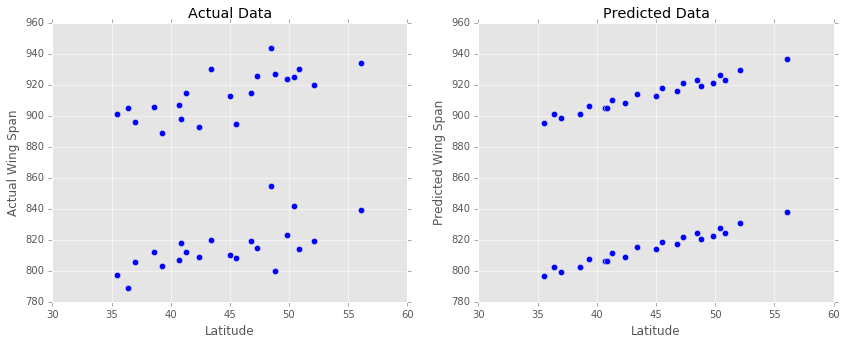

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

**Summary:** A `LinearRegression` uses the methods `fit` and `predict` to adapt itself to data, and to then make predictions.

### Classification: Logistic Regression

Our second example is **logistic regression**.  In logistic regression we have data $X$, and our response 
$y$ is a **binary** measurement.

A **binary** measurement can only take two values, which are traditionally labeled as $0$ and $1$.

Our example will use a dataset of wells in Bangladesh.  Many family wells are contaminated with arsenic; a team of scientists visited and measured:

  - The arsenic levels in each family's well.
  - The distance to the nearest safe well.
  - The level of education of the household.
  - The household's involvement in the community.
  
After discussing the level of arsenic with each family, the families with unsafe levels of arsenic were advised to switch to a nearby safe well.  Years later, the team followed up, and measured which families switched wells.

In [228]:
wells = pd.read_csv('./data/wells.dat', sep=' ')

In [229]:
wells.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


We can use a logistic regression to predict whether a family will switch based on the other data the team measured.

The first step is to create a `LogisticRegression` object.

In [230]:
wells_regression = LogisticRegression()

We can use the `fit` method of the `LogisticRegression` object to train the model using our data.

In [231]:
# We don't need the i'd column, so drop it.
X_wells_names = np.array(['arsenic', 'dist', 'assoc', 'educ'])
X_wells = wells[X_wells_names]
# The response is already encoded as 0's, and 1's.
y_wells = wells['switch']
wells_regression.fit(X_wells, y_wells)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that the regression has been fir, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [187]:
wells_predictions = wells_regression.predict(X_wells)
print(wells_predictions[:10])

[1 0 1 1 1 1 1 1 1 1]


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability** that a family will switch well.

In [188]:
wells_probabilities = wells_regression.predict_proba(X_wells)
print(wells_probabilities[:10])

[[ 0.31118714  0.68881286]
 [ 0.5614724   0.4385276 ]
 [ 0.26004991  0.73995009]
 [ 0.33241393  0.66758607]
 [ 0.38688941  0.61311059]
 [ 0.21484951  0.78515049]
 [ 0.3656605   0.6343395 ]
 [ 0.21683384  0.78316616]
 [ 0.31486767  0.68513233]
 [ 0.44459247  0.55540753]]


The `predict_proba` method creates a two column array, the first is the probability the family will not switch, the second is the probability they will.  This means that the rows of this matrix always add to $1$.

In [232]:
np.sum(wells_probabilities, axis=1)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

We can use the `predict_proba` method to plot the actual data, along with the predicted probabilities that a family will switch.

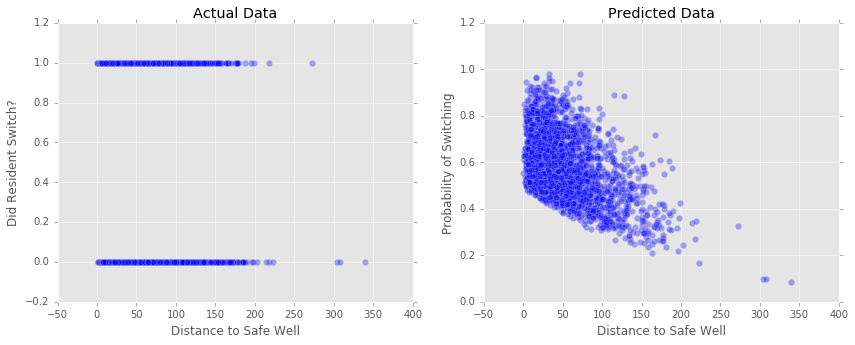

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(wells.dist, wells.switch, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Distance to Safe Well")
axs[0].set_ylabel("Did Resident Switch?")


axs[1].scatter(wells.dist, wells_probabilities[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Distance to Safe Well")
axs[1].set_ylabel("Probability of Switching")

### Alltogether

The two regression classes `LinearRegression` and `LogisticRegression` have many methods in common:

  - Both have a `fit` methods.  The `fit` methods for both take the same arguments `X` and `y`.
  - Both have a `predict` method.  The `predict` methods for both take the same argument, `X`.
  
We can summarize this by saying that **`LinearRegression` and `LogisticRegression` have the same interface**.  They have the same methods that are used to the same conceptual tasks.  This allows us to write code that performs high level tasks using the `fit` and `predict` methods, which can then be used with any object that implements both `fit` and `predict` methods.

## Transformers

### Standardizing Data

In [190]:
standardizer = StandardScaler()
standardizer.fit(X_wells)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
X_wells_standardized = standardizer.transform(X_wells)

In [192]:
for name, col in zip(X_wells_names, X_wells_standardized.T):
    print "Mean of column {}: {:2.2f}".format(name, col.mean())
    print "Standard Deviation of column {}: {:2.2f}".format(name, col.std())

Mean of column arsenic: -0.00
Standard Deviation of column arsenic: 1.00
Mean of column dist: 0.00
Standard Deviation of column dist: 1.00
Mean of column assoc: -0.00
Standard Deviation of column assoc: 1.00
Mean of column educ: -0.00
Standard Deviation of column educ: 1.00


In [193]:
wells_regression_standardized = LogisticRegression()
wells_regression_standardized.fit(X_wells_standardized, y_wells)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
print(wells_regression_standardized.coef_)

[[ 0.51572495 -0.34391818 -0.06132579  0.17016938]]


### Removing Features

In [195]:
best_3_selector = SelectKBest(chi2, k=3)
best_3_selector.fit(X_wells, y_wells)
X_wells_3_best = best_3_selector.transform(X_wells)
X_wells_3_best.shape

(3020, 3)

In [196]:
print(X_wells_names[best_3_selector.get_support()])

['arsenic' 'dist' 'educ']


### Grabbing Specific Columns

In [214]:
class ColumnSelector(object):
    
    def __init__(self, idxs):
        self.idxs = np.asarray(idxs)
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        # Need to teat pandas data frames and numpy arrays slightly differently.
        if isinstance(X_wells, pd.DataFrame):
            return X.iloc[:, self.idxs]
        return X[:, self.idxs]

In [220]:
column_selector = ColumnSelector([0])
column_selector.fit()
X_wells_column_selected = column_selector.transform(X_wells)

In [221]:
print(X_wells_column_selected.shape)
print(X_wells_names[column_selector.idxs])

(3020, 1)
['arsenic']


## Combining Objects: Pipelines

In [215]:
wells_pipeline = Pipeline([
    ('select_best_3', SelectKBest(chi2, k=3)),
    ('standarzide', StandardScaler()),
    ('regression', LogisticRegression())
])

In [216]:
wells_pipeline.fit(X_wells, y_wells)

Pipeline(steps=[('select_best_3', SelectKBest(k=3, score_func=<function chi2 at 0x10ee316e0>)), ('standarzide', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [217]:
wells_pipeline.named_steps['regression'].coef_

array([[ 0.51720702, -0.34373906,  0.17166697]])

## Combining Objects: FeatureUnion

In [222]:
class PolynomialExpansion(object):
    
    def __init__(self, degree):
        self.degree = degree
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        X_poly = np.zeros((X.shape[0], self.degree))
        X_poly[:, 0] = X.squeeze()
        for i in range(2, self.degree + 1):
            X_poly[:, i-1] = X_poly[:, i-2] * X.squeeze()
        return X_poly

In [223]:
quadratic_transformer = PolynomialExpansion(2)
quadratic_transformer.fit()
quadratic_transformer.transform(X_wells['arsenic'])

array([[ 2.36  ,  5.5696],
       [ 0.71  ,  0.5041],
       [ 2.07  ,  4.2849],
       ..., 
       [ 0.51  ,  0.2601],
       [ 0.64  ,  0.4096],
       [ 0.66  ,  0.4356]])

In [224]:
p = Pipeline([
    ('arsenic_selector', ColumnSelector([0])),
    ('quadratic_expansion', PolynomialExpansion(2))
])
p.fit(X_wells)
p.transform(X_wells)

array([[ 2.36  ,  5.5696],
       [ 0.71  ,  0.5041],
       [ 2.07  ,  4.2849],
       ..., 
       [ 0.51  ,  0.2601],
       [ 0.64  ,  0.4096],
       [ 0.66  ,  0.4356]])

In [225]:
cs = ColumnSelector([0])
p = PolynomialExpansion(2)

cs.fit(X_wells)
p.fit(X_wells)

X1 = cs.transform(X_wells)
p.transform(X1)

array([[ 2.36  ,  5.5696],
       [ 0.71  ,  0.5041],
       [ 2.07  ,  4.2849],
       ..., 
       [ 0.51  ,  0.2601],
       [ 0.64  ,  0.4096],
       [ 0.66  ,  0.4356]])

In [ ]:
X1

In [226]:
wells_pipeline = Pipeline([
    ('polynomial_expansions', FeatureUnion([
        ('arsenic_quadratic', Pipeline([
            ('arsenic_selector', ColumnSelector([0])),
            ('quadratic_expansion', PolynomialExpansion(2))
        ])),
        ('distance_quadratic', Pipeline([
            ('distance_selector', ColumnSelector([1])),
            ('quadratic_expansion', PolynomialExpansion(2))         
        ]))
    ])),
    ('regression', LogisticRegression())
])

In [227]:
wells_pipeline.fit(X_wells, y_wells)

Pipeline(steps=[('polynomial_expansions', FeatureUnion(n_jobs=1,
       transformer_list=[('arsenic_quadratic', Pipeline(steps=[('arsenic_selector', <__main__.ColumnSelector object at 0x11a8752d0>), ('quadratic_expansion', <__main__.PolynomialExpansion object at 0x11a875250>)])), ('distance_quadratic', Pipel...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## Creating Our Own Transformer